In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import BatchNormalization

from sklearn.model_selection import train_test_split




2024-03-02 18:46:45.899155: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 18:46:45.899281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 18:46:46.082964: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Read training images and labels 

In [3]:
df_path = "/kaggle/input/machine-learning-in-science-ii-2024/training_norm.csv" # data frame path
df = pd.read_csv(df_path)   # store the labels
df.head()


,image_id,angle,speed
0,1,0.4375,0.0
1,2,0.8125,1.0
2,3,0.4375,1.0
3,4,0.6250,1.0
4,5,0.5000,0.0


## Data Splitting Parameters

- **`test_size=0.2`**: This parameter specifies the proportion of the dataset to include in the validation split. Here, it's set to 20%, meaning that 20% of the data will be used for validation, and the remaining 80% will be used for training.

- **`random_state=42`**: This parameter sets the random seed for reproducibility. When the same random seed is used (`random_state` is fixed), the split will be the same each time you run the code. This is useful for reproducibility.


In [4]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
# Extract the image_ids for training and validation
train_image_ids = train_df['image_id'].astype(str) + '.png'
val_image_ids = val_df['image_id'].astype(str) + '.png'

training_image_path = "/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data"
train_image_paths = [os.path.join(training_image_path, filename) for filename in train_image_ids]
val_image_paths = [os.path.join(training_image_path, filename) for filename in val_image_ids]

#print(val_image_paths)

9273.png
9292.png
11396.png
4353.png
7968.png


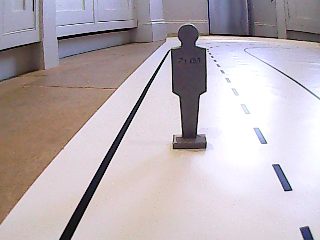

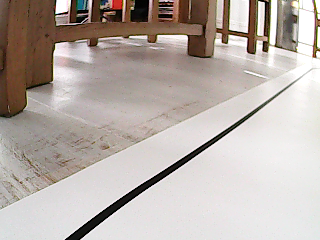

320


In [5]:

folder_content = os.listdir(training_image_path)
for item in folder_content[:5]:
    print(item)
img = Image.open("/kaggle/input/machine-learning-in-science-ii-2024/test_data/test_data/1.png")
display(img)
img2 = Image.open("/kaggle/input/machine-learning-in-science-ii-2024/test_data/test_data/2.png")
display(img2)
print(img.size[0])
img_width = img.size[0]
img_height = img.size[1]
# Get the number of channels
channels = 3 # RGB channels


In [6]:
def create_cnn_model_v2(input_shape, pool_size=(2, 2)):
    model = Sequential()


    # Use InputLayer to specify the input shape
    model.add(InputLayer(input_shape=input_shape))  
    model.add(BatchNormalization())

    model.add(Conv2D(8, (3, 3), padding='valid', strides=(1, 1), activation='relu', name='Conv1'))
    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1, 1), activation='relu', name='Conv2'))
    model.add(MaxPooling2D(pool_size=pool_size))

    model.add(Conv2D(16, (3, 3), padding='valid', strides=(1, 1), activation='relu', name='Conv3'))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1, 1), activation='relu', name='Conv4'))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3, 3), padding='valid', strides=(1, 1), activation='relu', name='Conv5'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=pool_size))

    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1, 1), activation='relu', name='Conv6'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='valid', strides=(1, 1), activation='relu', name='Conv7'))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=pool_size))

    model.add(Flatten())

    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))  # Output layer with 1 neuron for regression tasks

    return model

In [7]:
batch_size = 128
datagen = ImageDataGenerator(rescale=1./255)  

# Add the full path to the file names
file_path  = "/kaggle/input/machine-learning-in-science-ii-2024/training_data/training_data"
train_df['file_path'] = file_path  + '/' + train_df['image_id'].astype(str) + '.png'

generator = datagen.flow_from_dataframe(
    train_df,
    x_col='file_path',
    y_col='speed',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw'
)


Found 11034 validated image filenames.


In [8]:
pool_size = (2, 2)
input_shape = (img_height, img_width, 3)
model_2 = create_cnn_model_v2(input_shape)
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [9]:
num_epochs = 10  # Set the number of training epochs
history = model_2.fit(generator, epochs=num_epochs)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1709405310.569978     115 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709405310.593928     115 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


73/87 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7447 - loss: 3.6068


KeyboardInterrupt



In [ ]:
# Assuming you have defined and compiled your Keras model
